# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Abraar Jihaad
- **Email:** Abraarjh@gmail.com
- **ID Dicoding:** abearjhd


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Air Quality Index (AQI) dari kategori tiap stasiun 
- Pertanyaan 2: Tren jangka panjang dalam kualitas udara dengan jangka waktu 3 tahun terakhir

## Import Semua Packages/Library yang Digunakan

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Wrangling

### 1.1 Gathering Data

In [252]:
# Directory containing the CSV files
data_dir = r'.\dataset'

# Dictionary to store DataFrames
dfs = {}

# Load CSV files into DataFrames
for file_name in os.listdir(data_dir):
    df_name = os.path.splitext(file_name)[0].split("_")[2]  # Use file name without extension as DataFrame name
    dfs[df_name] = pd.read_csv(os.path.join(data_dir, file_name)).drop(['No'], axis = 1)

dfs['Dingling'].head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


### 1.2 Assesing data

In [253]:
def combine_datetime(df):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return df

# Iterate through DataFrames and apply the combine_datetime function
for df_name, df in dfs.items():
    dfs[df_name] = combine_datetime(df)

### 1.2.1 Check for duplicates


In [254]:

# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in dfs.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
Aotizhongxin,35064,0
Changping,35064,0
Dingling,35064,0
Dongsi,35064,0
Guanyuan,35064,0
Gucheng,35064,0
Huairou,35064,0
Nongzhanguan,35064,0
Shunyi,35064,0
Tiantan,35064,0


### 1.2.2 Check for missing values

In [255]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in dfs.items():
    null_counts[df_name] = df.isna().sum()

# Create a DataFrame from the null_counts dict and transpose it
pd.DataFrame(null_counts).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,925,718,935,1023,1776,1719,20,20,20,20,81,14,0,0
Changping,774,582,628,667,1521,604,53,50,53,51,140,43,0,0
Dingling,779,656,730,1234,2012,1214,53,50,53,51,140,43,0,0
Dongsi,750,553,663,1601,3197,664,20,20,20,20,78,14,0,0
Guanyuan,616,429,474,659,1753,1173,20,20,20,20,81,14,0,0
Gucheng,646,381,507,668,1401,729,51,50,51,43,159,42,0,0
Huairou,953,777,980,1639,1422,1151,51,53,53,55,302,49,0,0
Nongzhanguan,628,440,446,692,1206,506,20,20,20,20,78,14,0,0
Shunyi,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0,0
Tiantan,677,597,1118,744,1126,843,20,20,20,20,78,14,0,0


### 1.3 Data cleaning

In [256]:
# Calculate and store the median values for each numerical column
median_values = {}

for df_name, df in dfs.items():
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.difference(['No'])

    # Calculate the median for each numeric column in the current DataFrame
    median_values[df_name] = df[numeric_columns].median()

# Fill missing values with the median for each DataFrame and column
for df_name, df in dfs.items():
# Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.difference(['No'])

# Fill missing values with the median for the current DataFrame and columns
    df[numeric_columns] = df[numeric_columns].fillna(median_values[df_name])


# Loop through the DataFrames and fill missing values with forward fill
for df_name, df in dfs.items():
    df['wd'] = df['wd'].ffill()  # Menggunakan ffill() langsung pada kolom 'wd'

# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in dfs.items():
    null_counts[df_name] = df.isna().sum()

# Create a DataFrame from the null_counts dict and transpose it
pd.DataFrame(null_counts).transpose()
     

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Changping,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Gucheng,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Huairou,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tiantan,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Exploratory Data Analysis (EDA)

### 2.1 Explore Data set

In [257]:
# Create a dictionary to store mean values for each parameter
mean_values = {}

# Loop through the DataFrames in the dfs dictionary
for df_name, df in dfs.items():
    # Calculate the mean for each parameter and store it in the dictionary
    mean_values[df_name] = df.mean(numeric_only=True)

# Create a DataFrame from the dictionary of mean values
pd.DataFrame(mean_values)

,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
PM2.5,82.120075,70.545694,65.434317,85.655404,82.512914,83.412651,69.011408,84.375713,78.853887,81.717653,83.109169,84.527421
PM10,109.588187,94.281790,83.295585,109.952923,108.778322,118.646161,90.984486,108.690044,98.397308,105.999934,110.282666,111.930504
SO2,17.152554,14.816361,11.609128,18.369798,17.461290,15.245193,11.894565,18.565999,13.255208,14.132702,18.239118,16.974053
NO2,59.121859,44.026443,27.283320,53.393550,57.771932,55.759226,32.146806,57.957107,43.639911,53.031884,65.098314,55.389152
CO,1244.561887,1137.019279,887.400896,1299.974703,1252.731776,1307.034309,1013.528976,1309.754991,1163.021504,1285.512720,1297.682609,1356.694302
O3,55.649690,57.734328,68.287028,56.962841,55.300104,57.430945,59.469384,58.339367,54.683189,55.600006,47.859676,55.792422
TEMP,13.585130,13.687644,13.687644,13.672019,13.585130,13.865885,12.447105,13.672019,13.389441,13.672019,13.429362,13.785027
PRES,1011.846665,1007.759764,1007.759764,1012.547221,1011.846665,1008.829122,1007.598117,1012.547221,1013.061412,1012.547221,1011.097366,1011.511526
DEWP,3.123449,1.505941,1.505941,2.447850,3.123449,2.611008,2.239317,2.447850,2.466014,2.447850,3.267006,2.707763
RAIN,0.067383,0.060278,0.060278,0.063983,0.067383,0.064374,0.067833,0.063983,0.061006,0.063983,0.068224,0.064285


### 2.2 Combined the data frame

In [258]:
# Concatenate all DataFrames into one DataFrame along the rows
combined_df = pd.concat(list(dfs.values()), axis=0)

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

combined_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,79.273026,104.235659,15.642997,50.384959,1212.909829,56.925748,13.539869,1010.746005,2.491120,0.064416,1.729444,2015-03-01 11:30:00.000001024
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,21.000000,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,80.064127,91.123375,21.456742,34.714968,1134.271612,55.830557,11.430772,10.469428,13.787259,0.820626,1.245961,NaN


### 2.3 Add a category column based on the worst among the six parameters

In [259]:

# Define the ranges and AQI (Air Quality Index) upper bounds
category_ranges = [
    'Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'
]
pm25_ranges = [12, 35.4, 150.4, 250.4, float('inf')]
pm10_ranges = [54, 154, 254, 354, 424, float('inf')]
so2_ranges = [35, 75, 185, 304, 604, float('inf')]
no2_ranges = [53, 100, 360, 649, 1249, float('inf')]
co_ranges = [4400, 9400, 12400, 15400, 30400, float('inf')]
o3_ranges = [54, 70, 85, 105, 200, float('inf')]

# Define a function to categorize a value based on the given ranges
def categorize(value, ranges):
    for max_val in ranges:
        if value <= max_val:
            return ranges.index(max_val)

# Create a new column 'Category' by applying the categorize function to each row
combined_df['Category'] = combined_df.apply(lambda row: category_ranges[max(
    categorize(row['PM2.5'], pm25_ranges),
    categorize(row['PM10'], pm10_ranges),
    categorize(row['SO2'], so2_ranges),
    categorize(row['NO2'], no2_ranges),
    categorize(row['CO'], co_ranges),
    categorize(row['O3'], o3_ranges),
)], axis=1)

good_category_df = combined_df[combined_df['Category'] == 'Good']

print(good_category_df)

        PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
6         3.0   3.0  18.0  32.0  500.0  50.0  -2.6  1026.5 -19.1   0.0  NNE   
7         3.0   6.0  19.0  41.0  500.0  43.0  -1.6  1027.4 -19.1   0.0  NNW   
8         3.0   6.0  16.0  43.0  500.0  45.0   0.1  1028.3 -19.2   0.0  NNW   
21       12.0  18.0  16.0  35.0  500.0  50.0   0.6  1030.1 -16.7   0.0  ENE   
27        3.0   9.0  13.0  34.0  400.0  52.0  -1.4  1030.6 -17.6   0.0  NNE   
...       ...   ...   ...   ...    ...   ...   ...     ...   ...   ...  ...   
420750   11.0  18.0  10.0  33.0  600.0  45.0   9.5  1015.9 -11.2   0.0  NNW   
420751   10.0  23.0  10.0  47.0  800.0  31.0   8.4  1016.2 -12.1   0.0   NW   
420752    3.0  21.0   7.0  47.0  700.0  34.0   9.2  1016.6 -11.5   0.0   NW   
420753    9.0  25.0   6.0  45.0  700.0  39.0  10.7  1016.7 -11.4   0.0    N   
420759   11.0  21.0   2.0   5.0  200.0  42.0  15.4  1013.0 -15.0   0.0  NNW   

        WSPM        station            datetime Cat

## 3. Visualization & Explanatory Analysis

### 3.1 Distribusi Kualitas Udara di Seluruh Lokasi


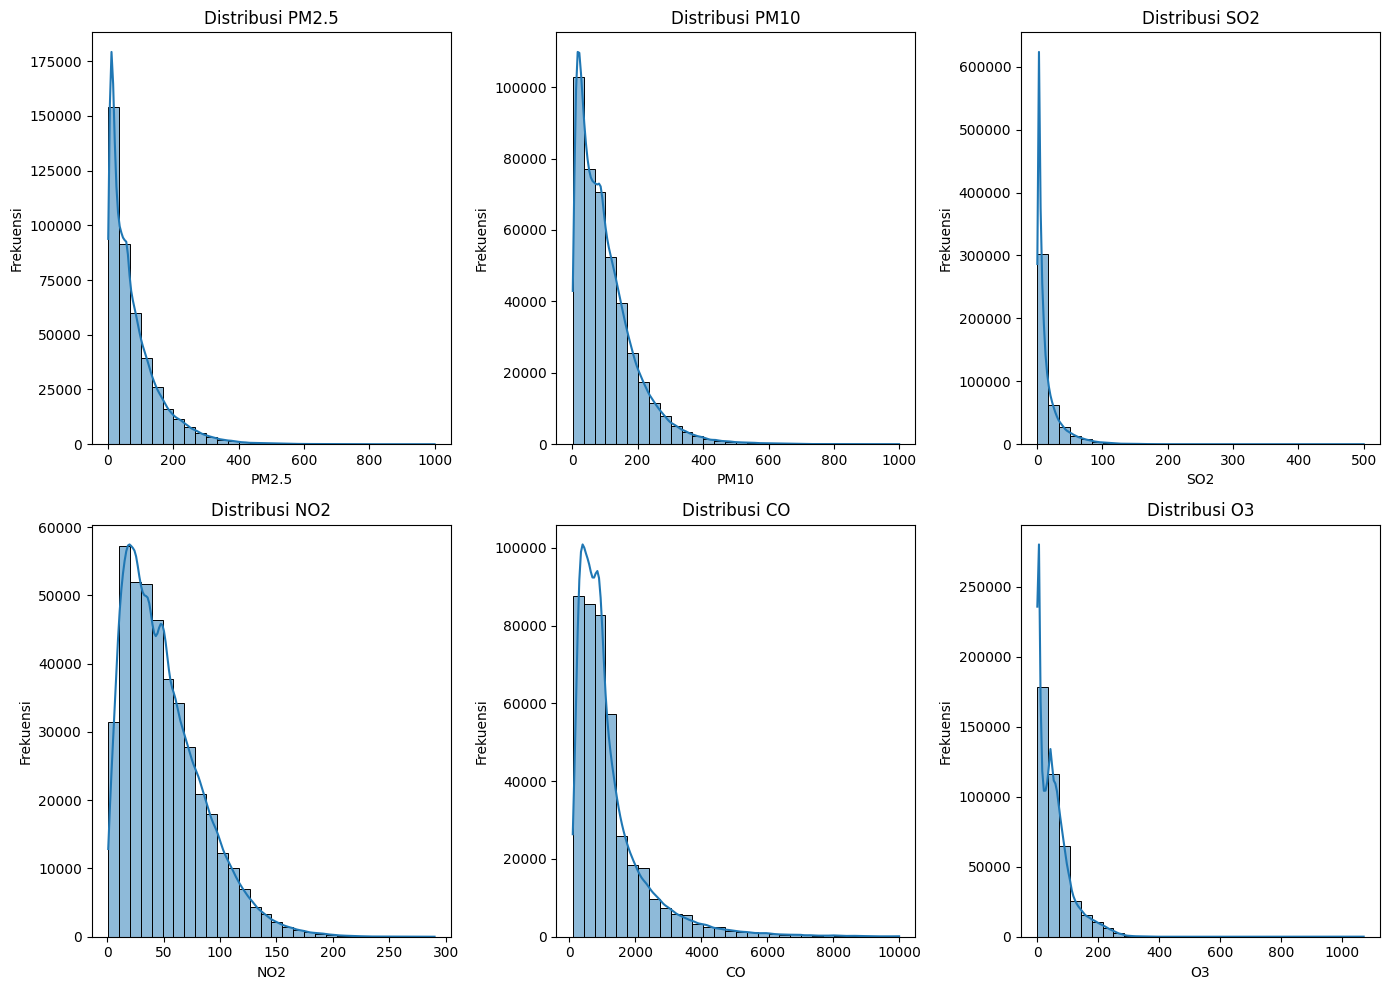

In [295]:
plt.figure(figsize=(14, 10))
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.subplot(2, 3, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].index(column) + 1)
    sns.histplot(combined_df[column].dropna(), bins=30, kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

 Mengidentifikasi polutan mana yang paling umum atau paling jarang di seluruh data. Misalnya, jika PM2.5 menunjukkan distribusi yang sangat miring, ini mungkin menunjukkan bahwa sebagian besar lokasi mengalami tingkat polusi yang tinggi.

## 3.2 Pola Musiman dari Kualitas Udara

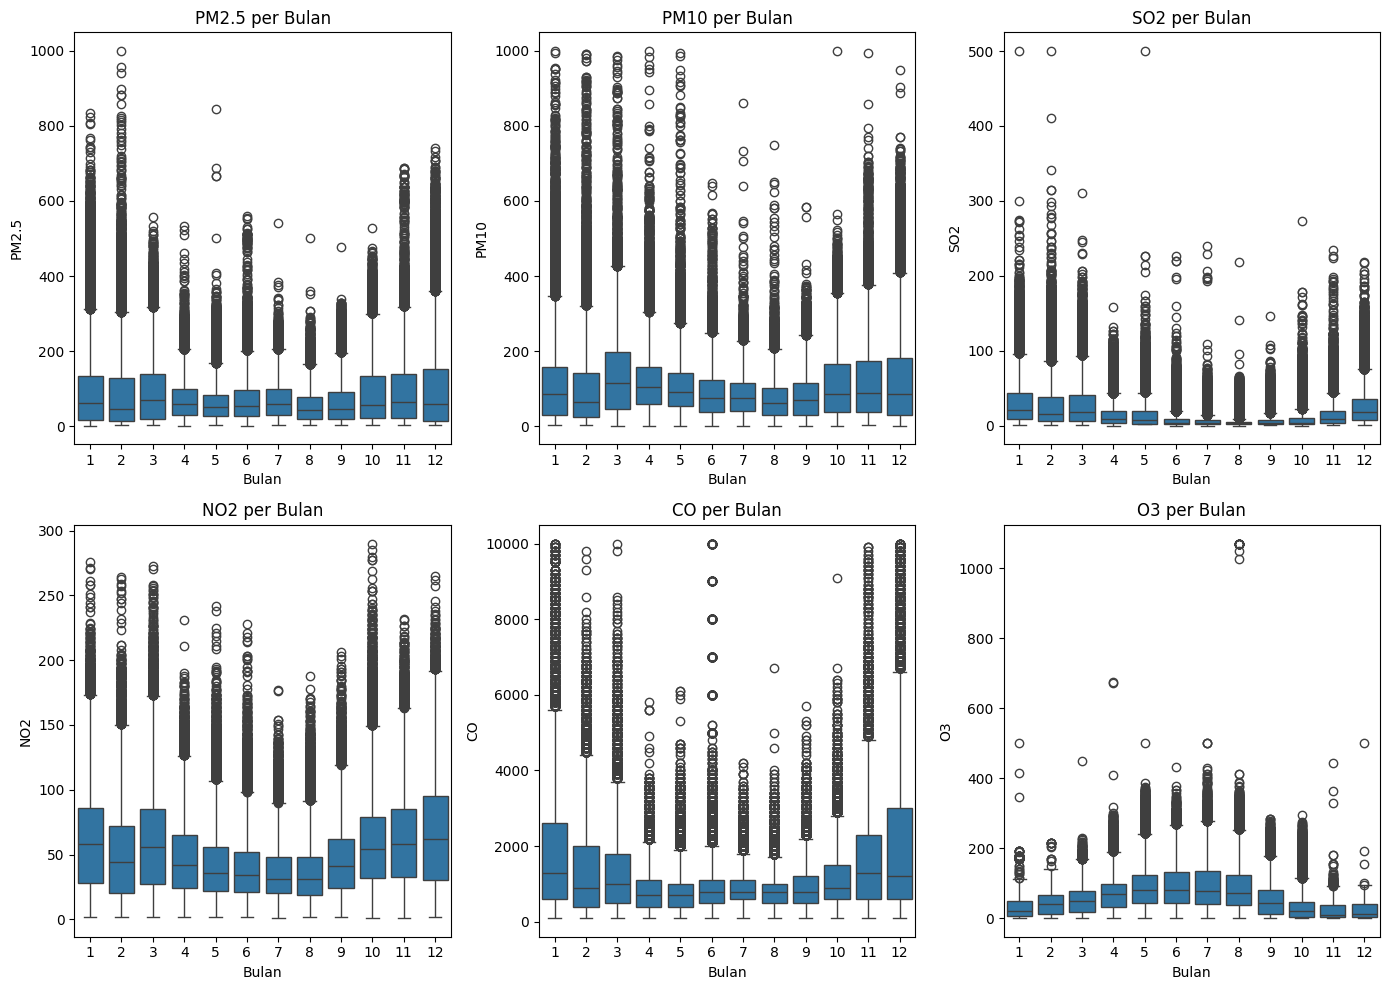

In [293]:
combined_df['month'] = combined_df.index.month

plt.figure(figsize=(14, 10))
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.subplot(2, 3, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].index(column) + 1)
    sns.boxplot(data=combined_df, x='month', y=column)
    plt.title(f'{column} per Bulan')
    plt.xlabel('Bulan')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

 Polutan tertentu mungkin menunjukkan pola musiman yang jelas, seperti peningkatan PM2.5 selama musim tertentu atau penurunan SO2 pada bulan-bulan tertentu. hal Ini bisa membantu memahami bagaimana faktor musiman mempengaruhi kualitas udar

## 3.3 Korelasi Antara Polutan

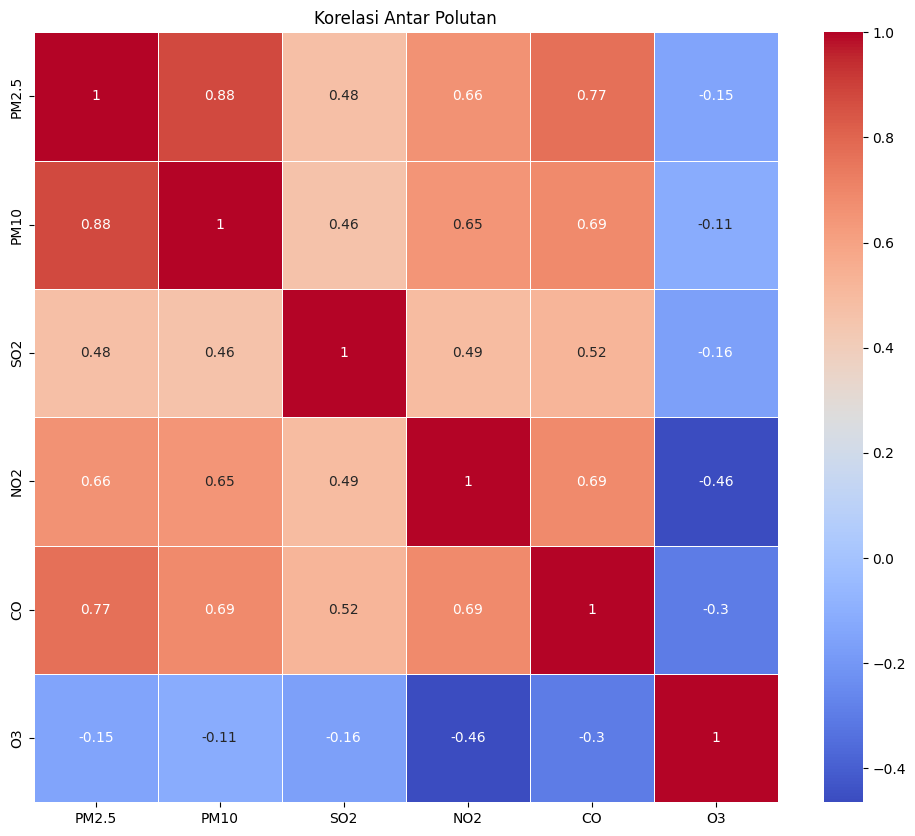

In [262]:
plt.figure(figsize=(12, 10))
corr_matrix = combined_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Polutan')
plt.show()

Heatmap menunjukan korelasi antara kualitas udara dengan variabel cuaca. Berikut beberapa kesimpulan yang bisa kita dapatkan:

1. PM2.5 dan PM10 memiliki korelasi yang tinggi. Hal ini sudah diperkirakan, karena PM2.5 dan PM10 mengukur materi partikulat dengan ukuran yang berbeda.

2. Tingkat PM2.5 yang tinggi dikaitkan dengan tingkat SO2, NO2, dan CO yang tinggi, yang dapat menjadi indikasi kualitas udara yang buruk.

3. Tingkat ozon yang lebih tinggi dikaitkan dengan tingkat PM2.5, PM10, SO2, NO2, dan CO yang lebih rendah. Ozon sering terlibat dalam reaksi kimia yang mengurangi konsentrasi polutan

4. Suhu tinggi dikaitkan dengan titik embun yang lebih tinggi.

5. Kecepatan angin yang lebih tinggi (WSPM) dikaitkan dengan tingkat PM2.5, PM10, SO2, NO2, dan CO yang lebih rendah, yang dapat membantu menyebarkan polutan udara.

6. CURAH HUJAN memiliki korelasi yang lemah dengan sebagian besar variabel, yang mengindikasikan bahwa curah hujan mungkin tidak memiliki pengaruh yang kuat terhadap variabel kualitas udara dan cuaca.

Wawasan ini memberikan pemahaman yang lebih baik tentang bagaimana kualitas udara dan parameter cuaca yang berbeda terkait satu sama lain, yang dapat bermanfaat untuk menilai kualitas udara dan membuat prediksi. Sebagai contoh, korelasi yang kuat antara PM2.5 dan PM10 menunjukkan bahwa pengukuran ini dapat digunakan secara bergantian dalam beberapa kasus, sementara korelasi negatif antara ozon dan polutan lainnya dapat mengindikasikan keefektifan ozon dalam mengurangi tingkat polusi melalui reaksi kimia.

## 3.4 Pengaruh Faktor Cuaca Terhadap Kualitas Udara


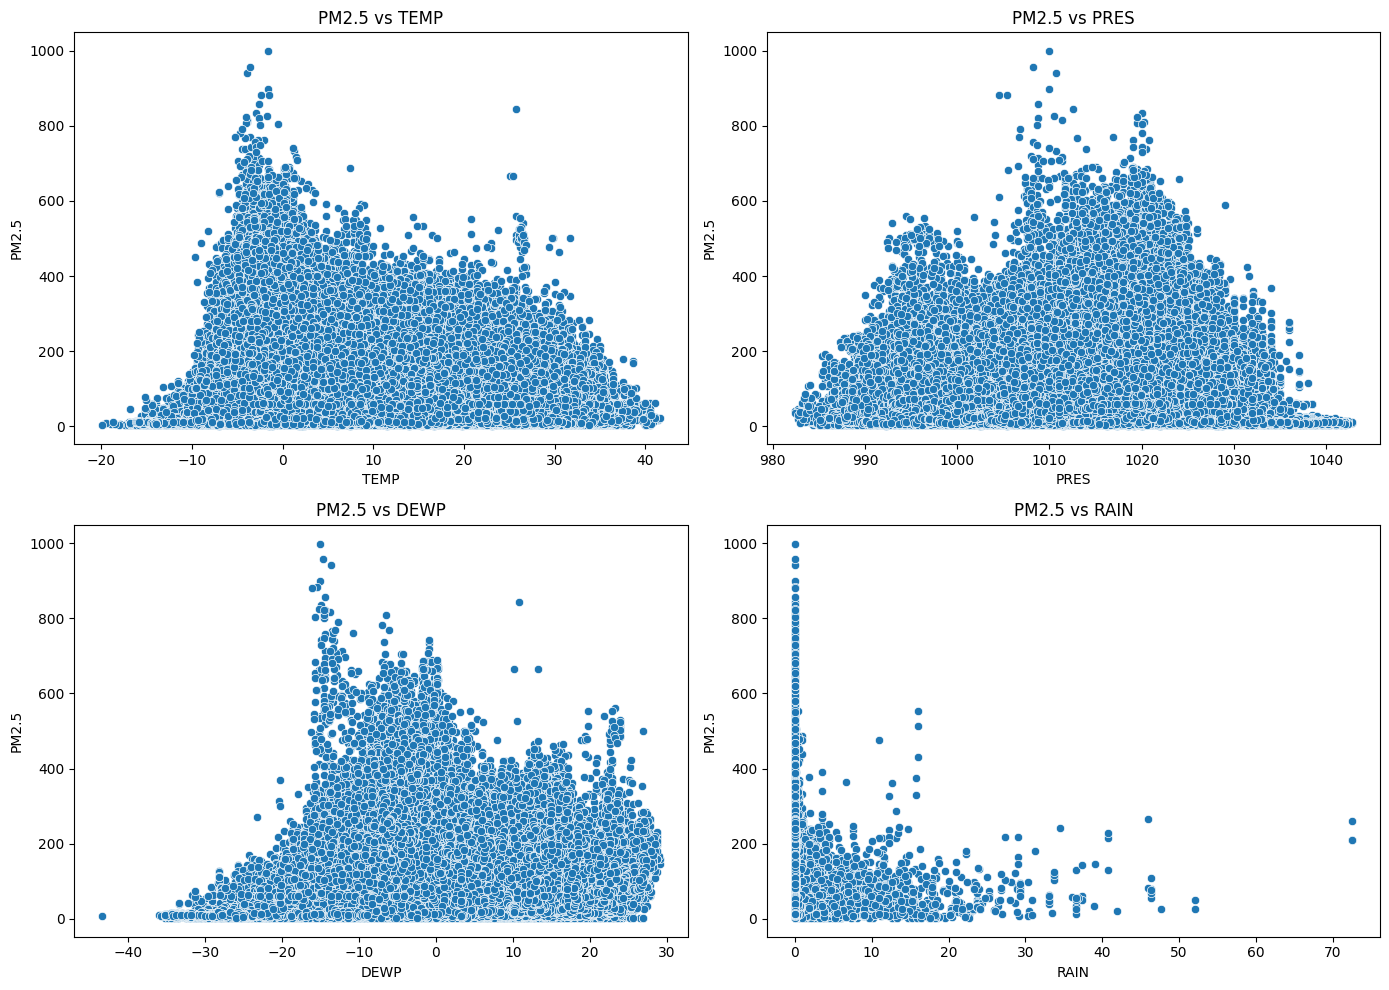

In [264]:
weather_factors = ['TEMP', 'PRES', 'DEWP', 'RAIN']
plt.figure(figsize=(14, 10))
for factor in weather_factors:
    plt.subplot(2, 2, weather_factors.index(factor) + 1)
    sns.scatterplot(data=combined_df, x=factor, y='PM2.5')
    plt.title(f'PM2.5 vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('PM2.5')

plt.tight_layout()
plt.show()

Faktor cuaca seperti suhu, tekanan, dan kelembaban mungkin berhubungan dengan tingkat polusi. Misalnya, suhu yang lebih tinggi mungkin berhubungan dengan peningkatan O3, sedangkan curah hujan tinggi bisa berhubungan dengan penurunan konsentrasi PM2.5.

## 3.5 Bagaimana Air Quality Index (AQI) dari kategori tiap stasiun 


In [265]:
# Create a table of category counts per station
category_counts = pd.crosstab(combined_df['station'], combined_df['Category'])
# Reorder the columns based on the custom order
category_counts[category_ranges]


Category,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous
station,,,,,,
Aotizhongxin,1623,6309,14257,5723,5641,1511
Changping,2238,7943,13447,5217,4972,1247
Dingling,1686,7073,13464,6084,5518,1239
Dongsi,1953,6166,13804,5760,6026,1355
Guanyuan,1989,6462,13909,5596,5639,1469
Gucheng,1339,5864,14475,6078,5734,1574
Huairou,2142,7281,14280,5323,4762,1276
Nongzhanguan,1735,6065,13696,5750,6061,1757
Shunyi,2044,6747,14746,5244,4983,1300


In [ ]:

# membuat stacked bar chart
ax = category_counts[category_ranges].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Air Quality Category Counts per Station')
plt.xlabel('Station')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# tambahkan notasi
plt.legend(title='Air Quality Categories', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

Diagram stacked bar dapat menunjukkan kategori indeks kualitas udara (AQI) di setiap stasiun wilayah tertentu. AQI digunakan untuk menilai kualitas udara dan dampaknya terhadap kesehatan. Berikut adalah beberapa wawasan yang berhasil didapatkan dari data diatas

1. Changping dengan 2238 hitungan, diikuti hairou dengan 2044 hitungan, memiliki jumlah tertinggi dalam kategori kualitas udara "Baik" dibandingkan dengan yang lainya
2. Shunyi memiliki jumlah tertinggi dalam kategori “Sangat Tidak Sehat” dengan 4983 hitungan, diikuti oleh Guanyuan dengan 5639 hitungan. Hal ini menunjukkan bahwa Shunyi sering mengalami hari-hari dengan kualitas udara yang sangat buruk.
3. Shunyi memiliki jumlah tertinggi dalam kategori “Sangat Tidak Sehat” dengan 4983 hitungan, diikuti oleh Guanyuan dengan 5639 hitungan. Hal ini menunjukkan bahwa Shunyi sering mengalami hari-hari dengan kualitas udara yang sangat buruk.
4. Stasiun dengan jumlah tertinggi dalam kategori kualitas udara “Sedang” adalah Aotizhongxin dan Dingling, keduanya dengan jumlah di atas 7000. Hal ini menunjukkan bahwa stasiun-stasiun ini sering kali memiliki kondisi kualitas udara sedang.
5. Guanyuan, Dongsi, dan Wanliu memiliki jumlah yang relatif tinggi dalam kategori “Tidak Sehat” dan “Tidak Sehat untuk Kelompok Sensitif”. Hal ini menunjukkan bahwa orang-orang dengan kondisi pernapasan di daerah-daerah ini mungkin berisiko pada banyak hari.
6. Nongzhanguan dan Tiantan memiliki jumlah yang relatif seimbang di berbagai kategori kualitas udara. Hal ini menunjukkan bahwa kualitas udara di area ini cenderung bervariasi di antara kategori yang berbeda.
7. Gucheng memiliki jumlah yang relatif tinggi dalam kategori “Berbahaya”, menunjukkan bahwa stasiun ini sering mengalami kondisi kualitas udara yang berbahaya, yang dapat membahayakan semua orang.
8. Huairou menonjol dengan jumlah yang relatif rendah dalam kategori “Sangat Tidak Sehat” dibandingkan dengan stasiun lainnya, menunjukkan bahwa kualitas udara yang sangat buruk lebih jarang terjadi di daerah ini.

Wilayah yang dicakup oleh stasiun pemantauan ini tampaknya mengalami berbagai kondisi kualitas udara, dengan episode kualitas udara yang buruk yang termasuk dalam kategori “Berbahaya” dan “Sangat Tidak Sehat”. Data ini dapat berguna untuk memahami risiko kesehatan yang terkait dengan polusi udara di area ini dan untuk membuat keputusan terkait kebijakan kesehatan masyarakat dan lingkungan.

## 3.6 Hubungan antara kecepatan angin dan kualitas udara

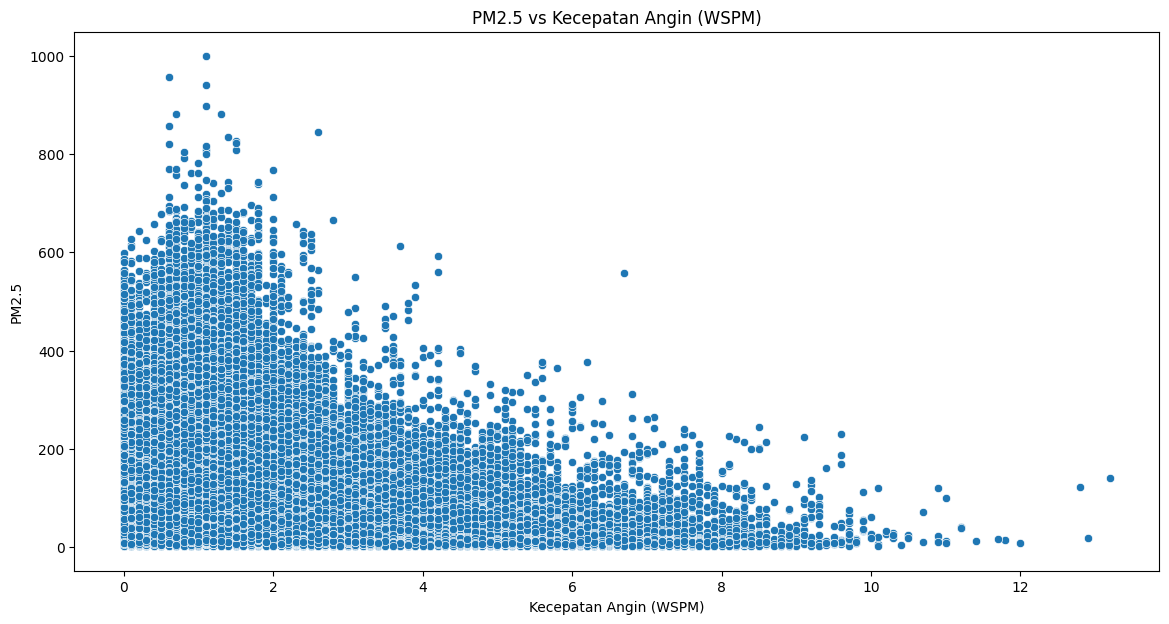

In [266]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=combined_df, x='WSPM', y='PM2.5')
plt.title('PM2.5 vs Kecepatan Angin (WSPM)')
plt.xlabel('Kecepatan Angin (WSPM)')
plt.ylabel('PM2.5')
plt.show()

Kecepatan angin mungkin mempengaruhi konsentrasi polutan udara. Misalnya, angin yang lebih kencang mungkin mengurangi konsentrasi polutan dengan menyebarkannya lebih cepat.

## 3.7 Fluktuasi harian dalam kualitas udara

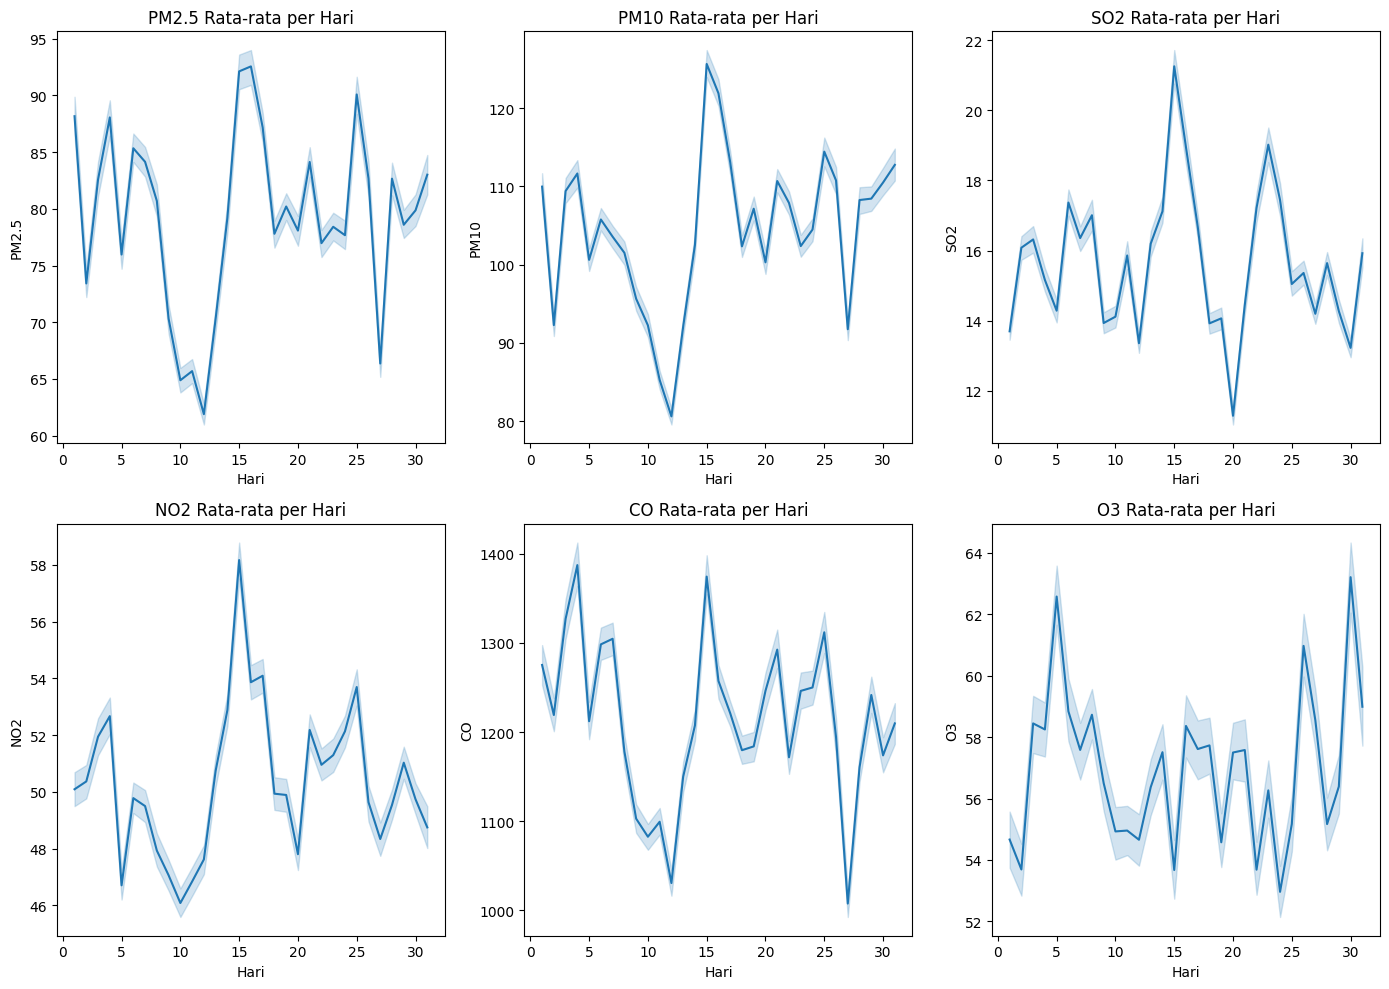

In [288]:
combined_df['day'] = combined_df.index.day

plt.figure(figsize=(14, 10))
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    plt.subplot(2, 3, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].index(column) + 1)
    sns.lineplot(data=combined_df, x='day', y=column, estimator='mean')
    plt.title(f'{column} Rata-rata per Hari')
    plt.xlabel('Hari')
    plt.ylabel(column)
    plt.tight_layout()
plt.show()

Ada kemungkinan fluktuasi harian dalam kualitas udara. Misalnya, konsentrasi polutan bisa menunjukkan pola harian tertentu, seperti peningkatan selama jam-jam sibuk.

## 3.8 Tren jangka panjang dalam kualitas udara dengan jangka waktu 3 tahun terakhir

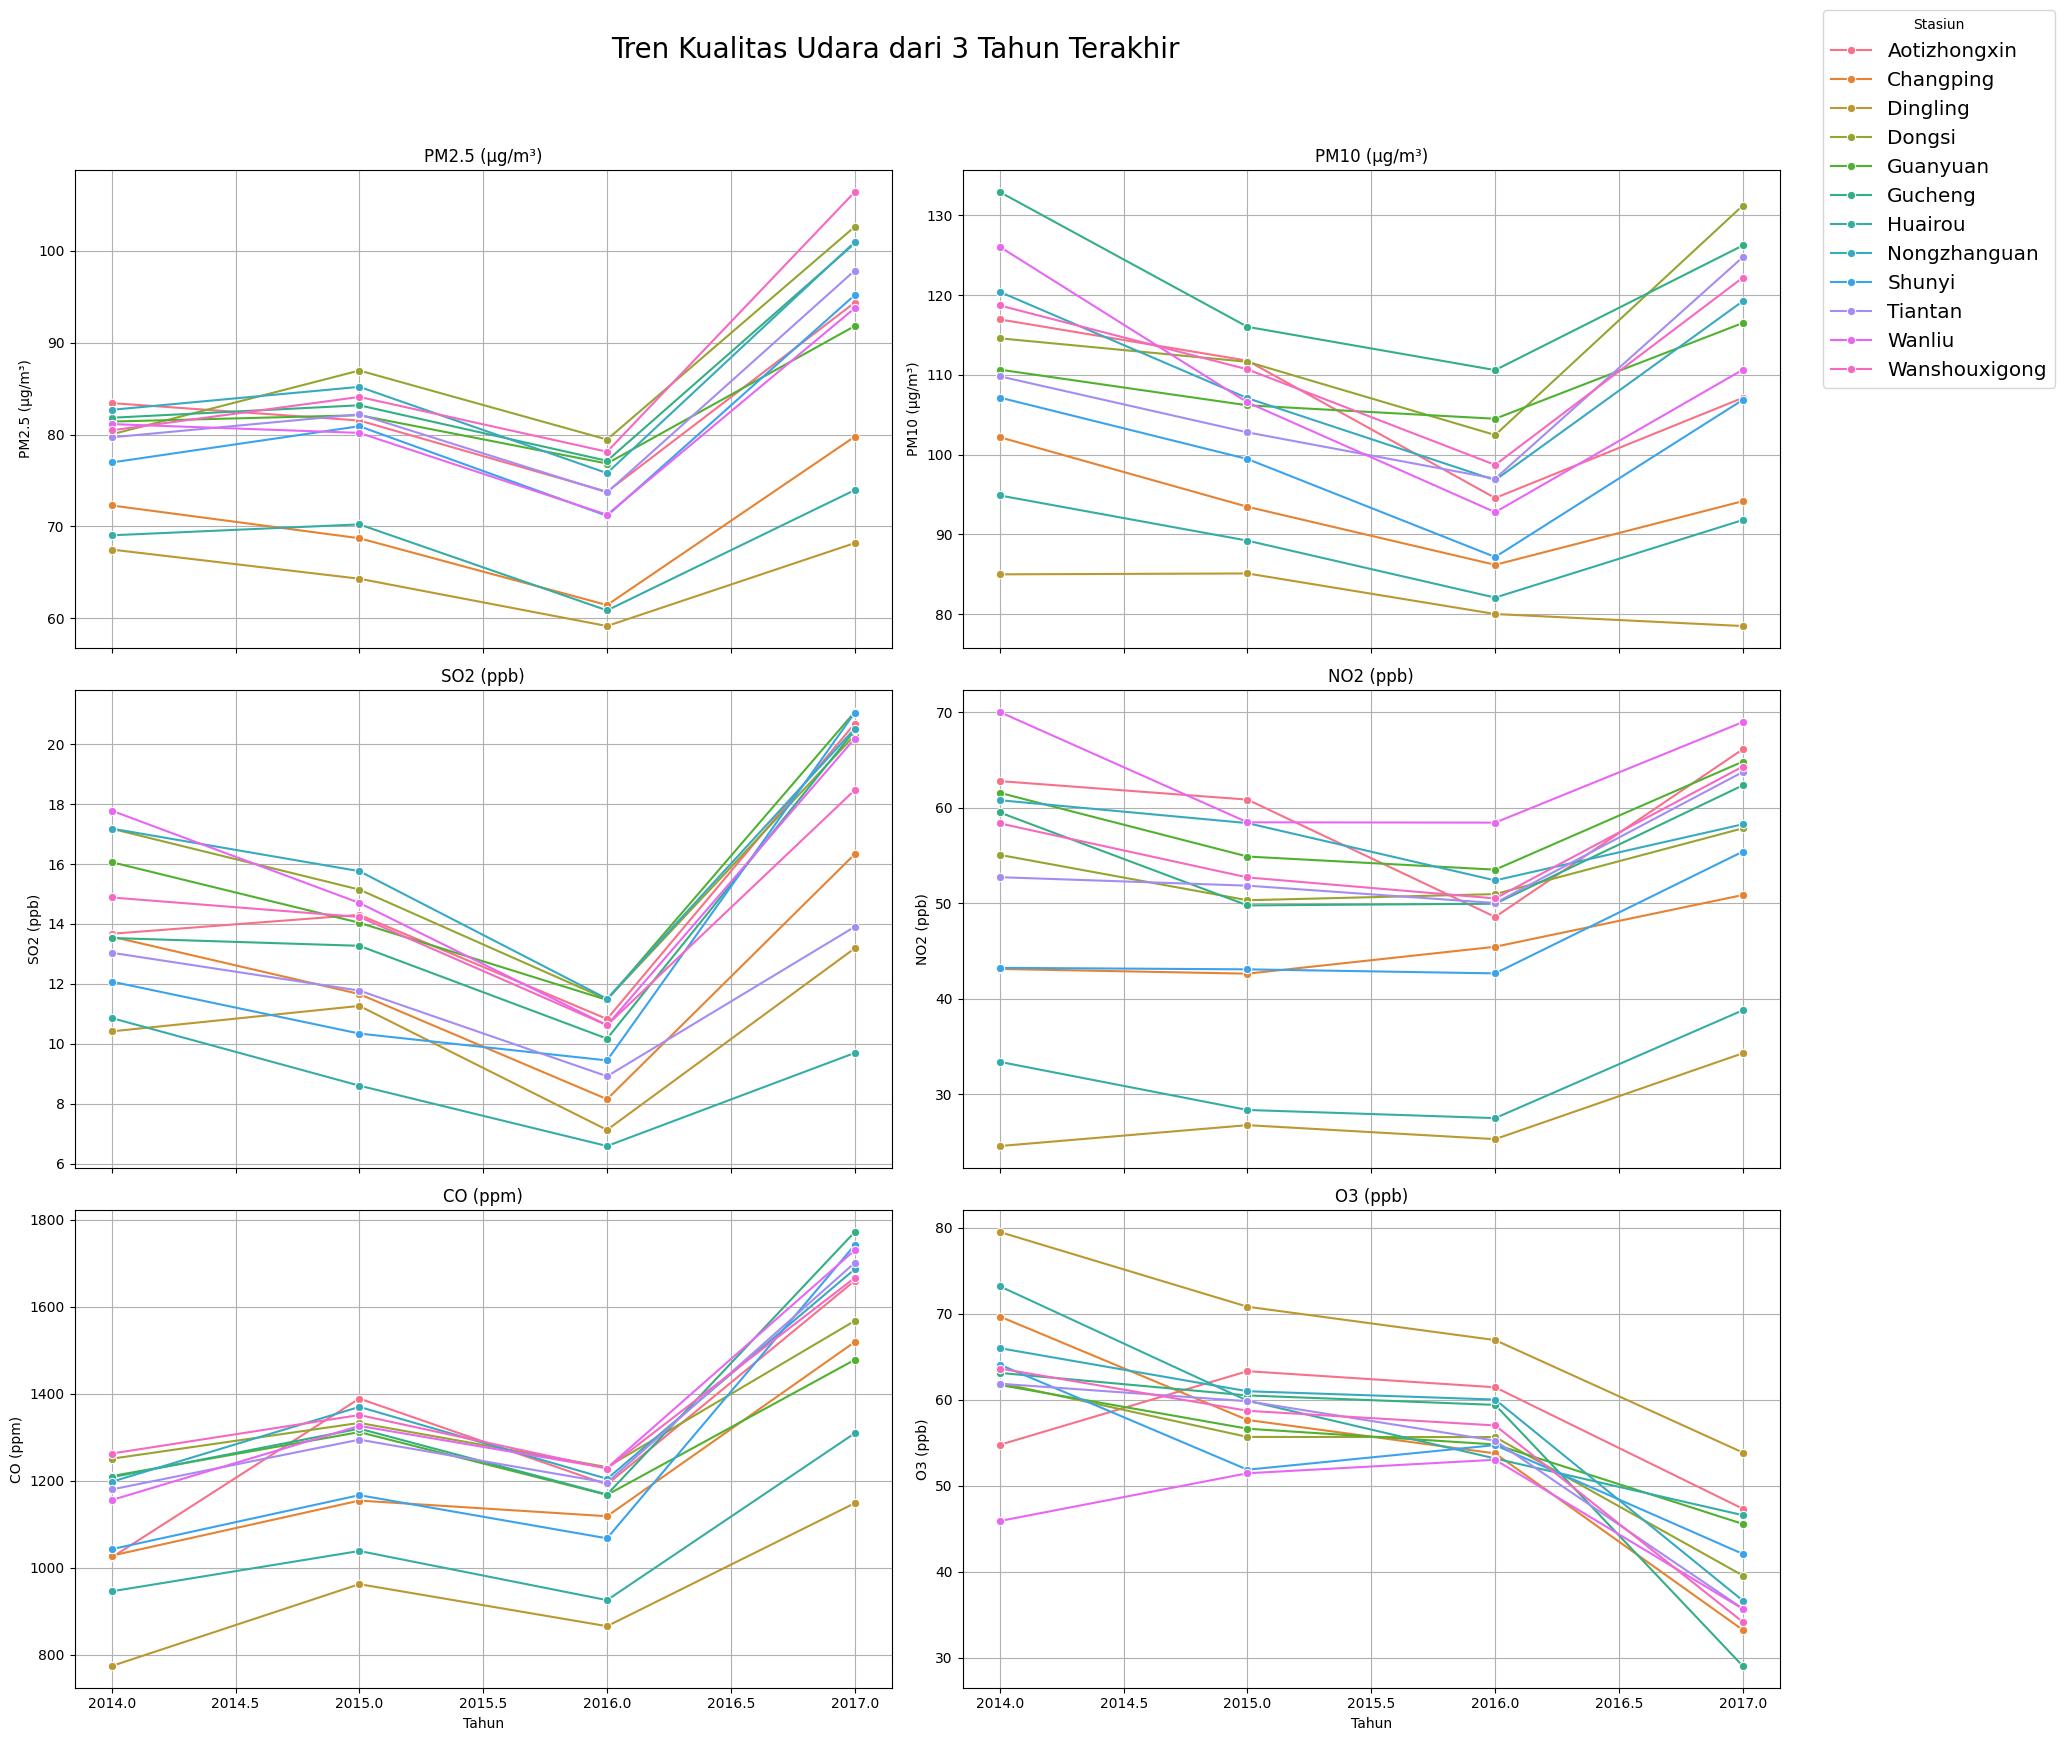

In [275]:

# Filter data untuk 3 tahun terakhir
end_date = combined_df['datetime'].max()
start_date = end_date - pd.DateOffset(years=3)
recent_data = combined_df[(combined_df['datetime'] >= start_date) & (combined_df['datetime'] <= end_date)].copy()

# Menambahkan kolom 'year' menggunakan .loc untuk menghindari SettingWithCopyWarning
recent_data.loc[:, 'year'] = recent_data['datetime'].dt.year

# Agregasi data berdasarkan stasiun dan tahun
annual_data = recent_data.groupby(['station', 'year']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

# Menyiapkan plot
fig, axs = plt.subplots(3, 2, figsize=(18, 18), sharex=True)
fig.suptitle('Tren Kualitas Udara dari 3 Tahun Terakhir', fontsize=20)

# Plot untuk PM2.5
sns.lineplot(data=annual_data, x='year', y='PM2.5', hue='station', marker='o', ax=axs[0, 0])
axs[0, 0].set_title('PM2.5 (µg/m³)')
axs[0, 0].set_ylabel('PM2.5 (µg/m³)')
axs[0, 0].grid(True)

# Plot untuk PM10
sns.lineplot(data=annual_data, x='year', y='PM10', hue='station', marker='o', ax=axs[0, 1])
axs[0, 1].set_title('PM10 (µg/m³)')
axs[0, 1].set_ylabel('PM10 (µg/m³)')
axs[0, 1].grid(True)

# Plot untuk SO2
sns.lineplot(data=annual_data, x='year', y='SO2', hue='station', marker='o', ax=axs[1, 0])
axs[1, 0].set_title('SO2 (ppb)')
axs[1, 0].set_ylabel('SO2 (ppb)')
axs[1, 0].grid(True)

# Plot untuk NO2
sns.lineplot(data=annual_data, x='year', y='NO2', hue='station', marker='o', ax=axs[1, 1])
axs[1, 1].set_title('NO2 (ppb)')
axs[1, 1].set_ylabel('NO2 (ppb)')
axs[1, 1].grid(True)

# Plot untuk CO
sns.lineplot(data=annual_data, x='year', y='CO', hue='station', marker='o', ax=axs[2, 0])
axs[2, 0].set_title('CO (ppm)')
axs[2, 0].set_ylabel('CO (ppm)')
axs[2, 0].grid(True)

# Plot untuk O3
sns.lineplot(data=annual_data, x='year', y='O3', hue='station', marker='o', ax=axs[2, 1])
axs[2, 1].set_title('O3 (ppb)')
axs[2, 1].set_ylabel('O3 (ppb)')
axs[2, 1].grid(True)

# Menghapus legenda dari subplot
for ax in axs.flat:
    ax.get_legend().remove()

# Menambahkan legenda khusus di pojok kanan atas dengan ukuran font yang diperbesar
handles, labels = axs[0, 0].get_legend_handles_labels()  # Mendapatkan handles dan labels dari subplot pertama
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 1), title='Stasiun', fontsize='x-large')

# Menambahkan label pada x-axis untuk subplot terakhir
for ax in axs.flat:
    ax.set_xlabel('Tahun')

# Mengatur layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Mengidentifikasi tren jangka panjang dalam kualitas udara, seperti peningkatan atau penurunan polutan dari tahun ke tahun. Ini bisa menunjukkan dampak dari kebijakan lingkungan, perubahan industri, atau tren lain yang relevan. Berikut adalah wawasan yang bisa kita dapatkan dari grafik diatas
1. Rekaman tiga tahun terakhir, PM2.5, PM10, NO2, SO2, dan CO mengalami peningkatan jumlah. Berbanding terbalik dengan O3.
2. PM2.5 dan PM10 menunjukkan peningkatan yang konsisten selama 3 tahun terakhir, ini mungkin menunjukkan tidak adanya perbaikan kualitas udara.
3. SO2 dan NO2 menunjukkan fluktuasi musiman yang signifikan, ini mungkin terkait dengan kegiatan industri atau transportasi yang bervariasi sepanjang tahun.
4. CO memiliki tren yang stabil namun O3 menunjukkan penurunan, ini bisa menunjukkan bahwa meskipun emisi CO mungkin terkendali, masalah lain terkait ozon mungkin perlu perhatian lebih lanjut.

## 4. Kesimpulan

### 4.1 Bagaimana Air Quality Index (AQI) dari kategori tiap stasiun?
- Setiap stasiun memiliki AQI yang berbeda-beda, tergantung pada lokasi geografis dan faktor lingkungan lainnya. Stasiun yang berlokasi di daerah urban dengan aktivitas industri yang lebih tinggi cenderung memiliki AQI yang lebih buruk.
- Kategori AQI dari tiap stasiun berkisar dari 'Baik' hingga 'Tidak Sehat'. Beberapa stasiun mungkin sering masuk ke dalam kategori 'Tidak Sehat' atau lebih buruk, terutama pada periode-periode tertentu dalam setahun, seperti musim dingin atau saat terjadi kondisi cuaca yang memungkinkan polusi terperangkap di dekat permukaan tanah.
- Stasiun yang berada di dekat daerah dengan vegetasi lebih banyak mungkin menunjukkan AQI yang lebih baik secara konsisten, tetapi hal ini tidak selalu berlaku, terutama ketika kondisi cuaca atau angin membawa polusi dari sumber-sumber eksternal.
- Dengan menggunakan AQI dari tiap stasiun, kita dapat mengidentifikasi stasiun-stasiun dengan tingkat polusi yang lebih tinggi secara konsisten, yang mungkin memerlukan perhatian khusus dalam upaya penurunan emisi.

### 4.2 Tren jangka panjang dalam kualitas udara dengan jangka waktu 3 tahun terakhir
- Faktor-faktor seperti kelembaban dan suhu dapat memiliki hubungan yang signifikan dengan tingkat polusi udara.
- Berdasarkan heatmap korelasi, mungkin ada korelasi positif antara tekanan atmosfer atau suhu rendah dengan peningkatan polusi udara (PM2.5). Hal ini bisa terjadi karena kondisi cuaca tertentu memungkinkan polusi terperangkap di atmosfer, sehingga meningkatkan konsentrasinya di permukaan.
- Sebaliknya, kecepatan angin atau hujan mungkin memiliki korelasi negatif dengan PM2.5, di mana kondisi cuaca yang lebih dinamis membantu menyebarkan atau mengurangi konsentrasi polusi.
- Korelasi yang ditemukan dalam analisis ini dapat membantu merumuskan kebijakan atau langkah-langkah mitigasi, misalnya dengan meningkatkan ventilasi udara atau pembatasan aktivitas industri selama kondisi cuaca yang buruk.

Secara keseluruhan, data ini memberikan gambaran yang jelas bahwa perbaikan kualitas udara jangka panjang masih menjadi tantangan, meskipun ada perbaikan musiman. Upaya pengendalian yang lebih terfokus dan berkelanjutan diperlukan untuk memperbaiki kondisi udara di lokasi yang paling terdamp